# Lab3

Please run the code cells sequentially.


In [1]:
# Install the required packages
! pip install -r requirements.txt

In [2]:
# Import necessary libraries
from utils.db_data_loader import DBDataLoader
import tabulate as tb
from utils.employee_model import EmployeeDataProcessor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Database Creation
The `employees` table is created in a PostgreSQL database using the following schema:
- `employee_id`: Integer, primary key, auto-incremented
- `name`: String
- `position`: String (IT-related job titles)
- `start_date`: Date (between 2015 and 2024)
- `salary`: Integer ($60,000–$200,000)
- `department_id`: Integer

The `departments` table is created in a PostgreSQL database using the following schema:
- `department_id`: Integer, primary key, auto-incremented
- `department_name`: String
- `location`: String
- `budget`: Integer


## Database Connection
The connection string for the Neon.tech PostgreSQL database is stored in `utils/constants.py` as `CONNECTION_STRING`.

## Fake Data Generation
Fake employee data is generated using the `Faker` library in the `EmployeeSeeder` class (`utils/fake_data_creator.py`). It creates 100 records with realistic names, IT job titles, start dates, and salaries for the employee table and 10 rows for the department table.

## Data Insertion
To insert the generated data into the database, call the `generate_and_insert()` static method of the `EmployeeSeeder` class. This method connects to the database and populates the `employees` table with the fake data and populates department table with the corresponding departments of employees.

In [3]:
#Uncomment the 2 lines below to run the data insertion (100 records)
# from utils.fake_data_creator import FakeDataSeeder
# FakeDataSeeder.generate_and_insert()

## Connect and Load Data

`DBDataLoader`, a class to connect to the PostgreSQL database and load data from the employees and departments tables into Pandas DataFrames.

Methods
`__init__(self)`
Initializes the database connection using the connection string from utils/constants.py.

`load_employees(self)`
Loads all records from the employees table into a Pandas DataFrame, closes the connection, and returns the DataFrame.

`load_departments(self)`
Loads all records from the departments table into a Pandas DataFrame, closes the connection, and returns the DataFrame.

`close(self)`
Closes the database connection.

In [4]:
# Load employees and departments data into DataFrames
employees_df = DBDataLoader().load_employees()
departments_df = DBDataLoader().load_departments()

#  Sorting employees by salary to show dirty records
sorted_employee_df = employees_df.sort_values(by='salary', na_position='first')

print(tb.tabulate(sorted_employee_df.head(),headers="keys",tablefmt="outline"))



+----+---------------+-----------------+--------------------+--------------+----------+-----------------+
|    |   employee_id | name            | position           | start_date   |   salary |   department_id |
+====+===============+=================+====================+==============+==========+=================+
|  0 |           501 | Peter Montes    | Frontend Developer | 2016-09-10   |      nan |              85 |
|  1 |           502 | Brittany Booker | Backend Developer  | 2024-11-07   |      nan |              87 |
| 26 |           527 | Christina Lee   | DevOps Engineer    | 2015-07-26   |    60224 |              90 |
| 36 |           537 | Anthony Cole    | QA Engineer        | 2016-05-27   |    61716 |              87 |
| 28 |           529 | Tara Bass       | Data Scientist     | 2016-12-16   |    62323 |              88 |
+----+---------------+-----------------+--------------------+--------------+----------+-----------------+


## Exploratory Data Analysis (EDA)

Initially, I used the 'DataWrangler' plugin to visualize and to get a basic idea of the dataset.

1. Data Collection - The data was sourced from a PostgreSQL database hosted on Neon.tech. The employees and departments tables were populated with synthetic data using the Faker library via the FakeDataSeeder class in utils/fake_data_creator.py. Data was loaded into Pandas DataFrames using the DBDataLoader class.
2. Data Cleaning - Duplicate or missing records removed, filled missing sallary fields with median. This is done using `remove_dupes_fill_salary` function in `EmployeeDataProcessor` class.
3. Data Transformation - New columns were created for analysis. The start_date column was converted to a datetime type. Job titles were standardized to ensure consistency. These steps are done in `clean_and_process` method of `EmployeeDataProcessor` class.
4. Feature Engineering - Additional features were derived to enhance analysis. For example, a years_of_service column was calculated by subtracting the start_date from the current date, providing insight into employee experience.
5. Scaling - salary was scaled using normalization techniques (Min-Max scaling) to ensure comparability and to prepare the data for machine learning algorithms if needed. This is done in `scale_salary` method of `EmployeeDataProcessor` class.





In the cleaned dataframe, you can see that 'years_of_service' is calculated, and the 'salary' column is normalized and added as a new column. Also the missing salary values are also now filled with median salary value.

In [5]:
employee_data_processor = EmployeeDataProcessor(sorted_employee_df)
employee_processed_df = employee_data_processor.clean_and_process()
print(tb.tabulate(employee_processed_df.head(),headers="keys",tablefmt="outline"))


+----+---------------+-----------------+--------------------+---------------------+----------+-----------------+--------------------+-----------------+
|    |   employee_id | name            | position           | start_date          |   salary |   department_id |   years_of_service |   salary_scaled |
+====+===============+=================+====================+=====================+==========+=================+====================+=================+
|  0 |           501 | Peter Montes    | Frontend Developer | 2016-09-10 00:00:00 |   113698 |              85 |                  8 |       0.383069  |
|  1 |           502 | Brittany Booker | Backend Developer  | 2024-11-07 00:00:00 |   113698 |              87 |                  0 |       0.383069  |
| 26 |           527 | Christina Lee   | Devops Engineer    | 2015-07-26 00:00:00 |    60224 |              90 |                  9 |       0         |
| 36 |           537 | Anthony Cole    | Qa Engineer        | 2016-05-27 00:00:00 |    6

## Descriptive Statistics

In [6]:

# Descriptive statistics of the processed employee data after removing the id columns because they do not make sense in this context
employee_processed_df.drop(['employee_id', 'department_id'], axis=1).describe()


,start_date,salary,years_of_service,salary_scaled
count,100,100.000000,100.000000,100.000000
mean,2019-12-24 14:38:24,122572.460000,4.940000,0.446638
min,2015-02-18 00:00:00,60224.000000,0.000000,0.000000
25%,2016-11-23 12:00:00,87094.500000,2.000000,0.192489
50%,2020-02-11 12:00:00,113698.500000,5.000000,0.383069
75%,2023-01-28 18:00:00,159271.750000,8.000000,0.709537
max,2024-12-27 00:00:00,199819.000000,10.000000,1.000000
std,NaN,41007.578992,3.246817,0.293761


## Standard Visualization
Grouped bar chart showing the average salary by position and start year

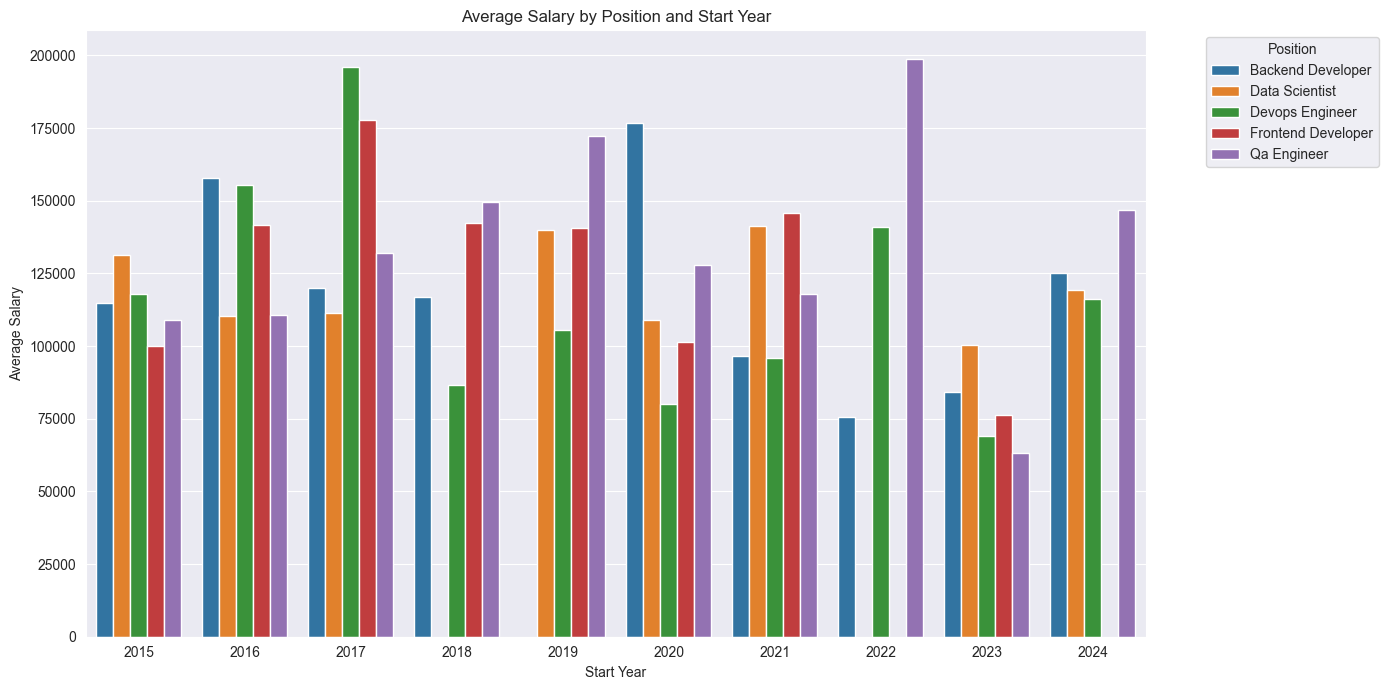

In [7]:
# Getting year from start_date
employee_processed_df['start_year'] = employee_processed_df['start_date'].dt.year

# Group and calculate mean salary
grouped = (
    employee_processed_df
    .groupby(['position', 'start_year'])['salary']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped,
    x='start_year',
    y='salary',
    hue='position'
)
plt.title('Average Salary by Position and Start Year')
plt.ylabel('Average Salary')
plt.xlabel('Start Year')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Findings
1. Backend Developers had a peak in 2020, with the highest average salary among all positions, but their salary dipped sharply in 2022.
2. QA Engineers showed significant growth, especially in 2019 and 2022, where they had the highest salary.
3. DevOps Engineers had the highest salary in 2017, indicating strong demand during that period.
4. Frontend Developers and Data Scientists had more stable trends generally, with a small drop in 2023 followed by recovery in 2024.

## Create a more complex dataset by merging additional information.

I am merging the employees and departments DataFrames on the `department_id` column to create a more complex dataset.

In [8]:
complex_df = pd.merge(
    employees_df,
    departments_df,
    on='department_id',
    how='left'
)

print(tb.tabulate(complex_df.head(), headers="keys", tablefmt="outline"))

+----+---------------+------------------+--------------------+--------------+----------+-----------------+-------------------+--------------------+----------+
|    |   employee_id | name             | position           | start_date   |   salary |   department_id | department_name   | location           |   budget |
+====+===============+==================+====================+==============+==========+=================+===================+====================+==========+
|  0 |           501 | Peter Montes     | Frontend Developer | 2016-09-10   |      nan |              85 | CICD              | West Betty         |   756328 |
|  1 |           502 | Brittany Booker  | Backend Developer  | 2024-11-07   |      nan |              87 | Cloud             | Josephland         |   930877 |
|  2 |           503 | Madison Lee      | Frontend Developer | 2023-02-12   |    76227 |              88 | Security          | West Larryfurt     |   692913 |
|  3 |           504 | Ashley Moore     | QA E

## Analyze distribution of salary distribution by department.

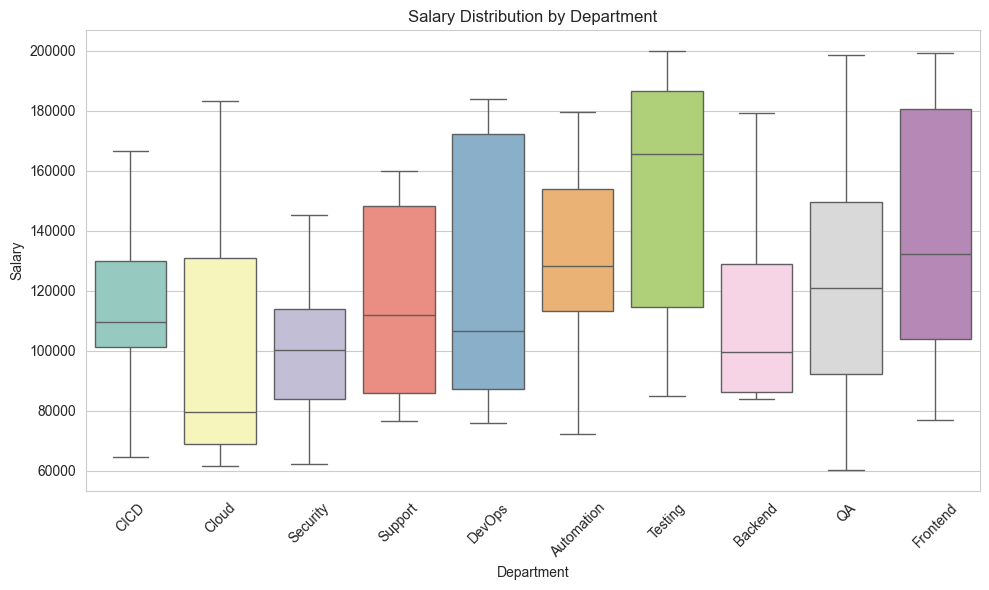

In [9]:
sns.set_style(style="whitegrid")

# Plot salary distribution by department
plt.figure(figsize=(10, 6))
sns.boxplot(data=complex_df, x='department_name', y='salary', hue='department_name', palette="Set3", legend=False)
plt.title('Salary Distribution by Department')
plt.ylabel('Salary')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Findings

1. Testing and Frontend departments offer the highest potential earnings. We can understand that from the wide interquartile range adn their median.
2. Cloud and QA departments have wider variability in pay, indicating inconsistency in roles or seniority levels. Very large ranges shows this.
3. Support and Security departments show the lowest medians.
4. Backend and CICD, Security departments have narrow interquartile ranges, reflecting more consistent salaries across positions within these departments.

## Heatmap of average salary by department and position

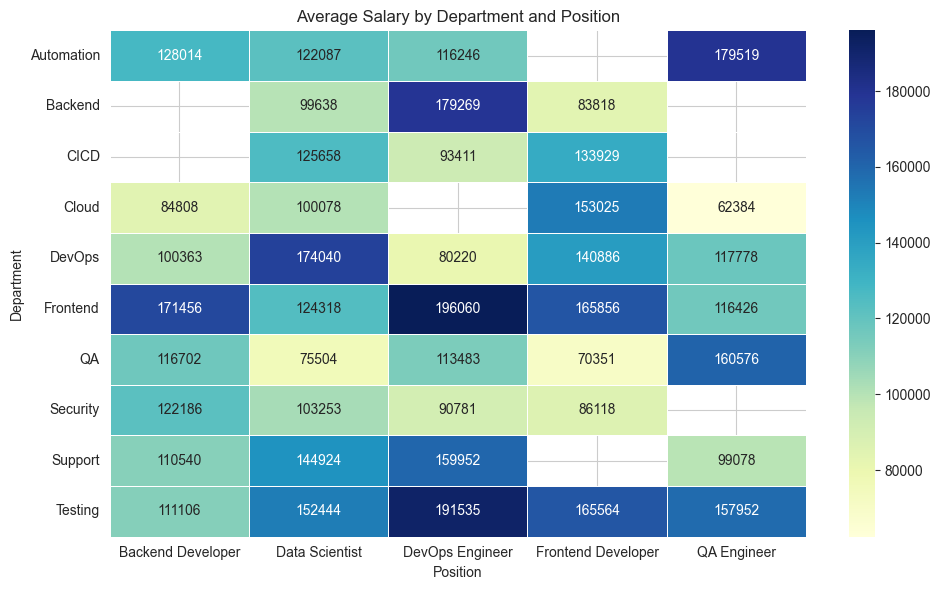

In [10]:
pivot_table = complex_df.pivot_table(
    values='salary',
    index='department_name',
    columns='position',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Salary by Department and Position")
plt.xlabel("Position")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

### Findings

1. Frontend Developer roles tend to have the highest salaries overall.
2. The Data Scientist role shows competitive salaries across departments.
3. Automation and Testing departments offer consistently high salaries for QA Engineers. This suggests a higher market value for QA roles in departments focused on automation and testing.
4. Cloud and Backend roles generally offer lower average salaries compared to others.

### References
- [Faker Documentation](https://faker.readthedocs.io/en/master/)
- [Psycopg2 Documentation](https://www.psycopg.org/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- [Seaborn Documentation](https://seaborn.pydata.org/)